In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Looking at data


In [7]:
# Import the data
filepath = "/Users/davidlindahl/Documents/DTU/02445/Individual_assignment/HR_data.csv"
df = pd.read_csv(filepath).drop(columns=["Unnamed: 0" , "Puzzler"])

For making the models, we first binarize frustrated, to make it more easy to predict.


In [8]:
# Adding Frustrated binary
threshold_value = 2
df['Frustrated Binary'] = np.where(df['Frustrated']>= threshold_value,1,0)

# Making a histogram of the data
# df.hist(bins=50, figsize=(20,15))
# plt.tight_layout()
# plt.savefig('/Users/davidlindahl/Documents/DTU/02445/Individual_assignment/Photos/histogram.png')

Now we make our models

In [9]:
# Import the models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier ,StackingClassifier , GradientBoostingClassifier

# Setup dictionary with models
models = {'Decision tree': DecisionTreeClassifier(),
          'ANN':MLPClassifier(hidden_layer_sizes=(100,) , activation='relu' , max_iter=300),
          'Baseline':DummyClassifier(strategy='most_frequent'),
          'RF': RandomForestClassifier(),
          'Logistic Regression': LogisticRegression()}

# Encode the data
df_encoded = df.copy()
df_encoded = pd.get_dummies(df_encoded)  # Encode categorical variables
df_encoded

# Setup X and y
y = df_encoded['Frustrated Binary']
X = df_encoded[['HR_Median' , 'HR_std' , 'HR_Max' , 'HR_AUC' , 'HR_Min' , 'HR_Mean']]
# X = df_encoded.iloc[:,14:16]
len(df) - y.sum()


np.int64(74)

# Plotting things

In [10]:
# import seaborn as sns

# # Calculate the correlation matrix
# corr_matrix = X.join(df_encoded['Frustrated']).corr()

# # Set the style and context to make the plot look more professional
# sns.set(style="white", context="talk")

# # Create a heatmap for the correlation matrix
# plt.figure(figsize=(12, 10))
# heatmap = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, cbar_kws={"shrink": .8})

# # Add title and labels
# heatmap.set_title('Correlation Matrix', fontdict={'fontsize': 18}, pad=16)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.tight_layout()

# # Save the heatmap as a high-resolution image
# plt.savefig('/Users/davidlindahl/Documents/DTU/02445/Individual_assignment/Photos/correlation_matrix_heatmap.png', dpi=300)

# # Create the pairplot
# pairplot = sns.pairplot(X.join(df_encoded['Frustrated']), diag_kind="kde", plot_kws={'alpha':0.5, 's':40, 'edgecolor':'k'}, diag_kws={'shade':True})

# # Customize the pairplot
# pairplot.fig.suptitle('Pairwise Relationships', y=1.02, fontsize=18)
# pairplot.fig.tight_layout()

# # Save the pairplot as a high-resolution image
# pairplot.savefig(dpi=300 ,fname='/Users/davidlindahl/Documents/DTU/02445/Individual_assignment/Photos/pairwise_relationships.png')

# # Show the plots
# plt.show()


# Feature selection

We can see from the above correlation matrix, that the mean and the median have a correlation of 95. Therefore removing one of these attributes could prove useful, since they are vey close to the same.

Whend doing this we also see, that the accuracy increases.


# Training the models and evaluating

In [11]:
# from sklearn.model_selection import GroupKFold
from sklearn.model_selection import StratifiedGroupKFold
# Initialize the model_accuracies dictionary
model_accuracies = {model_name:[] for model_name in models.keys()}

# Setup the group variable
group = df['Individual']

# Initialize the GroupKFold
group_kfold = StratifiedGroupKFold(n_splits=14)

# Now for training the model and evaluating them
for train_index , _test_index in group_kfold.split(X , y , groups=group):
    # Splitting the data
    X_train , X_test = X.iloc[train_index] , X.iloc[_test_index]
    y_train , y_test = y.iloc[train_index] , y.iloc[_test_index]

    for model_name, model in models.items():
        # Fitting the model
        model.fit(X_train , y_train)
        # print(f'{model_name} : {model.score(X_test , y_test)}')
        score = model.score(X_test,y_test)
        model_accuracies[model_name].append(score) 
model_accuracies

/Users/davidlindahl/Documents/DTU/02445/02445---LLMs-Project/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/davidlindahl/Documents/DTU/02445/02445---LLMs-Project/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative s

{'Decision tree': [0.3333333333333333,
  0.5833333333333334,
  0.25,
  0.6666666666666666,
  0.5833333333333334,
  0.5,
  0.5,
  0.5,
  0.5,
  0.4166666666666667,
  0.5,
  0.4166666666666667,
  0.25,
  0.6666666666666666],
 'ANN': [1.0,
  0.9166666666666666,
  0.8333333333333334,
  0.75,
  0.25,
  0.75,
  0.75,
  0.4166666666666667,
  0.16666666666666666,
  0.6666666666666666,
  0.5833333333333334,
  0.4166666666666667,
  0.4166666666666667,
  0.4166666666666667],
 'Baseline': [1.0,
  0.9166666666666666,
  0.16666666666666666,
  0.75,
  0.75,
  0.75,
  0.75,
  0.25,
  0.16666666666666666,
  0.3333333333333333,
  0.5833333333333334,
  0.4166666666666667,
  0.5833333333333334,
  0.4166666666666667],
 'RF': [0.3333333333333333,
  0.5833333333333334,
  0.16666666666666666,
  0.6666666666666666,
  0.6666666666666666,
  0.5833333333333334,
  0.5833333333333334,
  0.5,
  0.6666666666666666,
  0.4166666666666667,
  0.6666666666666666,
  0.5833333333333334,
  0.5,
  0.75],
 'Logistic Regression

# Calculating CI


In [12]:
# Initialize the CI
CI = {model_name: [] for model_name in models.keys()}
accuacies_bootstrap = {model_name : 0 for model_name in models.keys()}
# Number of bootstrap simulations
num_simulations = 10000

for model_name, accuracy_list in model_accuracies.items():
    # Create bootstrap samples
    bootstrap_estimates = np.random.choice(accuracy_list, size=(num_simulations, len(accuracy_list)), replace=True)
    
    # Calculate the mean of each bootstrap sample
    bootstrap_means = np.mean(bootstrap_estimates, axis=1)

    # Finding the mean accuracy:
    accuacies_bootstrap[model_name] = np.mean(bootstrap_estimates)
    
    # Find the quantiles
    lower_index = int(num_simulations * 0.025)
    upper_index = int(num_simulations * 0.975)

    # Find the lower and upper bound
    lower_bound = np.sort(bootstrap_means)[lower_index]
    upper_bound = np.sort(bootstrap_means)[upper_index]

    # Store the confidence interval
    CI[model_name] = [lower_bound, upper_bound]

print(CI)
print(accuacies_bootstrap)

{'Decision tree': [np.float64(0.40476190476190477), np.float64(0.5416666666666667)], 'ANN': [np.float64(0.4642857142857144), np.float64(0.7202380952380952)], 'Baseline': [np.float64(0.4226190476190476), np.float64(0.6964285714285714)], 'RF': [np.float64(0.4642857142857143), np.float64(0.6190476190476192)], 'Logistic Regression': [np.float64(0.41666666666666663), np.float64(0.6369047619047619)]}
{'Decision tree': np.float64(0.4762630952380953), 'ANN': np.float64(0.595992261904762), 'Baseline': np.float64(0.5598053571428572), 'RF': np.float64(0.5479315476190477), 'Logistic Regression': np.float64(0.5233232142857143)}


# EVALUATING THE MODEL: ANOVA
We will be performing a one-way ANOVA, since we have 3 classifiers trained on the same dataset.

## ANOVA: ASSUMPTIONS:
### FIRST: Normality assumptions

This is checked via Shapiro Wilk's test.

The Shapiro-Wilk test checks if the data is normally distributed. If the p-value is greater than 0.05, we fail to reject the null hypothesis, indicating that the data is normally distributed.


In [13]:
from scipy import stats
# Convert to arrays for easier handling
decision_tree = np.array(model_accuracies['Decision tree'])
baseline = np.array(model_accuracies['Baseline'])
logistic_regression = np.array(model_accuracies['Logistic Regression'])

# 1. Assumption of Normality
# Use Shapiro-Wilk test for normality
for model_name, model_ac in model_accuracies.items():
    shapiro_test = stats.shapiro(model_ac)
    print(f"Shapiro-Wilk Test p-value for {model_name}: {shapiro_test[1]}")


Shapiro-Wilk Test p-value for Decision tree: 0.24190385620309499
Shapiro-Wilk Test p-value for ANN: 0.5699287992892889
Shapiro-Wilk Test p-value for Baseline: 0.37155857632769945
Shapiro-Wilk Test p-value for RF: 0.07386445461065477
Shapiro-Wilk Test p-value for Logistic Regression: 0.2791896190180449


And also including qq plots to check for normality.

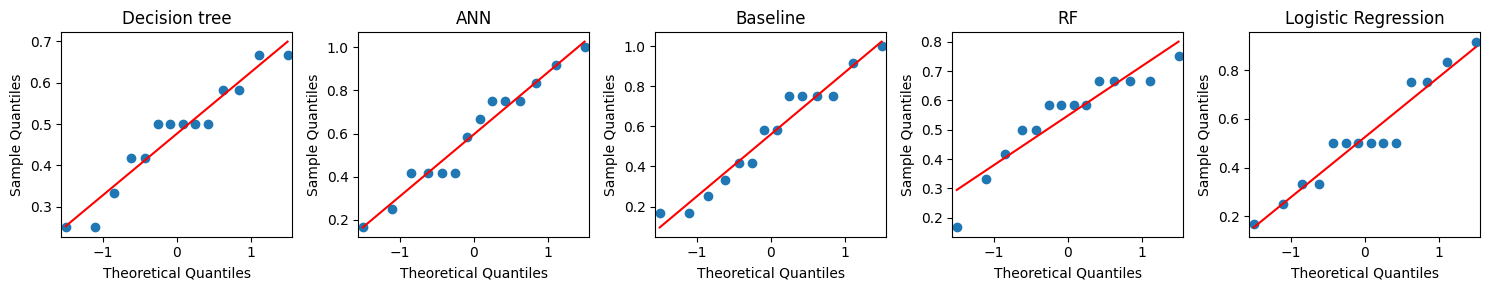

In [17]:
import statsmodels.api as sm

# Create figure and axes
fig, axes = plt.subplots(1, len(model_accuracies), figsize=(15, 3))

# Iterate through models and create QQ-plots
for ax, (model_name, model_ac) in zip(axes, model_accuracies.items()):
    sm.qqplot(np.array(model_ac), line='r', ax=ax)
    ax.set_title(model_name)
    ax.set_xlabel('Theoretical Quantiles')
    ax.set_ylabel('Sample Quantiles')

# Adjust layout
plt.tight_layout()
plt.savefig('/Users/davidlindahl/Documents/DTU/02445/Individual_assignment/Photos/QQ_plots.png')
plt.show()

## 2 Homogeneity of variance: Levene’s test,
This is checked via Levene's test.


In [15]:
# 2. Assumption of Homogeneity of Variances
# Get the model_ac numpy array
model_ac = []
for model_name , model_acc in model_accuracies.items():
    model_ac.append(model_acc)
model_ac = np.array(model_ac)

# Use Levene's test for homogeneity of variances
levene = stats.levene(*model_ac)
print(f"Levene's Test p-value: {levene.pvalue}")


Levene's Test p-value: 0.02036966153469704


## 3 Independende of observations:
This is checked via the chi-squared test.

In [37]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM

# Create a DataFrame
df_ac = pd.DataFrame(model_accuracies)

# Add a 'subject' column to identify each subject
df_ac['Fold'] = range(1, len(df_ac) + 1)

# Melt the DataFrame to long format
df_long = pd.melt(df_ac, id_vars=['Fold'], var_name='model', value_name='accuracy')

# Fit the repeated measures ANOVA model
aovrm = AnovaRM(df_long, 'accuracy', 'Fold', within=['model'])
res = aovrm.fit()

# Print the ANOVA table
print(res)

               Anova
      F Value Num DF  Den DF Pr > F
-----------------------------------
model  0.7713 4.0000 52.0000 0.5488



Since the chi-squared test's p-value is 1.0, we fail to reject the null hypothesis, indicating that the data is independent.

In [ ]:
# Performing one way ANOVA
from scipy.stats import f_oneway
statistic , p_value = f_oneway(*[model_accuracies[model_name] for model_name in models.keys()])
print(f'The p-value is {round(p_value,4)} and the statistic is {round(statistic,3)}')


The p-value is 0.6378 and the statistic is 0.637


Since the p-value is 0.9867, we can conclude that there is no significant difference between the classifiers.